In [1]:
import torch
from diffusion import VPSDE
import torchvision
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from denoising_diffusion_pytorch import Unet
from diffusion import VPSDE
from torch.utils.data import DataLoader
from training import train_score_network_mnist

/usr/lib/python3/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/lib/python3/dist-packages/torchvision/image.so: undefined symbol: _ZN3c107WarningC1ENS_7variantIJNS0_11UserWarningENS0_18DeprecationWarningEEEERKNS_14SourceLocationENSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEEb'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = 'cuda'
data = 'MNIST'
model = Unet(channels = 1, dim = 32).to(device)
model.load_state_dict(torch.load("warmstart")) # Load partially pretrained model to warmstart
sde = VPSDE(100, 0.1, 20, device = device)

''' hyper params'''
n_epochs =   50
batch_size =  32

In [3]:
tfm = transforms.Compose([transforms.ToTensor(), transforms.Pad(2)])
data = torchvision.datasets.MNIST(f'./data/', transform=tfm, download = True)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=2)

Using decoupled weight decay


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 and Loss: 6.902920246124268


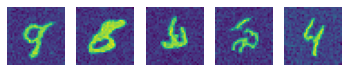

 10%|█         | 1/10 [02:20<21:03, 140.41s/it]

Epoch: 1 and Loss: 6.910552024841309


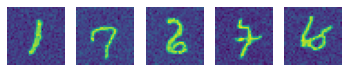

 20%|██        | 2/10 [04:40<18:42, 140.26s/it]

Epoch: 2 and Loss: 6.635791301727295


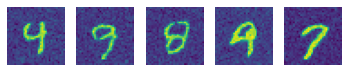

 30%|███       | 3/10 [07:03<16:30, 141.45s/it]

Epoch: 3 and Loss: 6.926823616027832


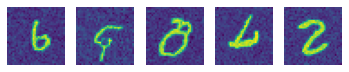

 40%|████      | 4/10 [09:21<14:01, 140.27s/it]

Epoch: 4 and Loss: 7.03166389465332


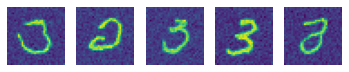

 50%|█████     | 5/10 [11:46<11:49, 141.95s/it]

Epoch: 5 and Loss: 6.861844062805176


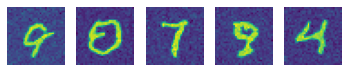

 60%|██████    | 6/10 [14:10<09:30, 142.69s/it]

Epoch: 6 and Loss: 6.645834445953369


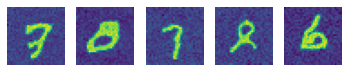

 70%|███████   | 7/10 [16:33<07:07, 142.63s/it]

Epoch: 7 and Loss: 7.026009559631348


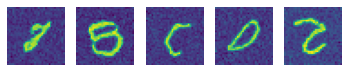

 80%|████████  | 8/10 [18:57<04:45, 142.96s/it]

Epoch: 8 and Loss: 6.90627384185791


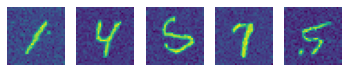

 90%|█████████ | 9/10 [21:19<02:22, 142.67s/it]

Epoch: 9 and Loss: 6.746537685394287


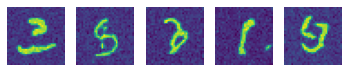

100%|██████████| 10/10 [23:43<00:00, 142.38s/it]


In [4]:
train_score_network_mnist(data_loader, model, sde, epochs=10)